**Importing the required number of libraries for the program to run**


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Uploading the dataset with the path and assigning it to the variable

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv') 

Displaying the first five entries in the data to get an idea of how the data looks like

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Visualization

Displaying the number of non-diabetic and diabteic people in the dataset

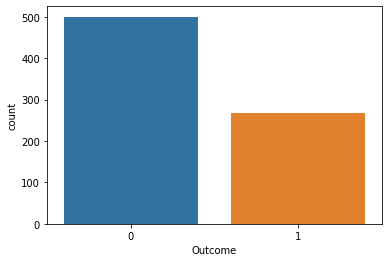

In [ ]:
sns.countplot(x = 'Outcome',data = diabetes_dataset)

Bar Graph of Each Column with respect to the outcome

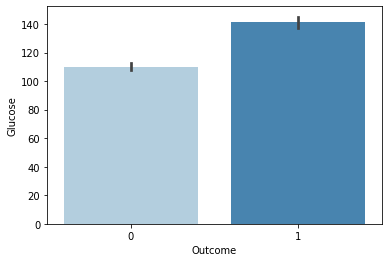

In [ ]:
sns.barplot(x='Outcome',y='Glucose',data=diabetes_dataset,palette="Blues")

The glucose and outcome relation could be seen as glucose increases the outcome of being diabetic also increases

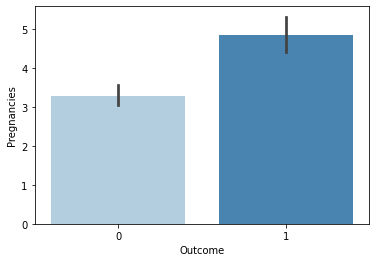

In [ ]:
sns.barplot(x='Outcome',y='Pregnancies',data=diabetes_dataset,palette="Blues")

The glucose and outcome relation could be seen as propotional ,glucose increases the outcome of being diabetic also increases

Outcome with respect to insulin

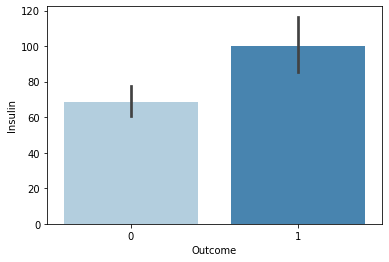

In [ ]:
sns.barplot(x='Outcome',y='Insulin',data=diabetes_dataset,palette="Blues")

The glucose and outcome relation could be seen as insulin increases the outcome of being diabetic also increases

Relation between Outcome and BMI

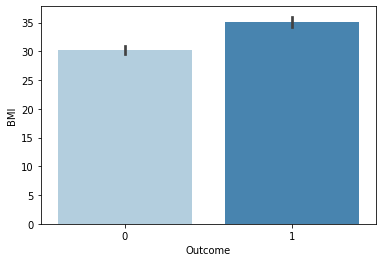

In [ ]:
sns.barplot(x='Outcome',y='BMI',data=diabetes_dataset,palette="Blues")

The BMI and outcome relation could be seen as glucose increases the outcome of being diabetic also increases(less difference as compared to others)

Relation between Diabetes Pedigree Function and Outcome

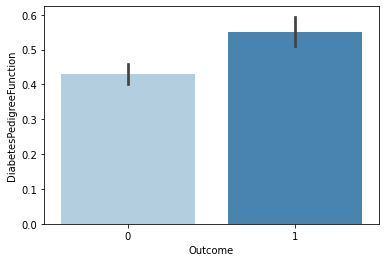

In [ ]:
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=diabetes_dataset,palette="Blues")

The Diabetes Pedeigree function and outcome relation could be seen as glucose increases the outcome of being diabetic also increases

In [ ]:
Relation betwewn Age and Outcome

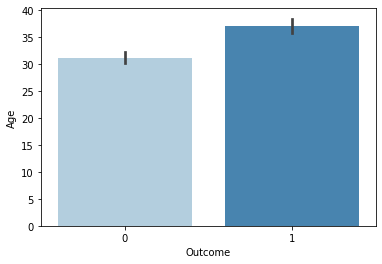

In [ ]:
sns.barplot(x='Outcome',y='Age',data=diabetes_dataset,palette="Blues")

The age and outcome relation could be seen as age increases the outcome of being diabetic also increases

As seen the increase of the all the columns or attributes can increase our outcome of having diabetes

Heat Map

Making a heat map so as to classify which columns greatly affect our outcome

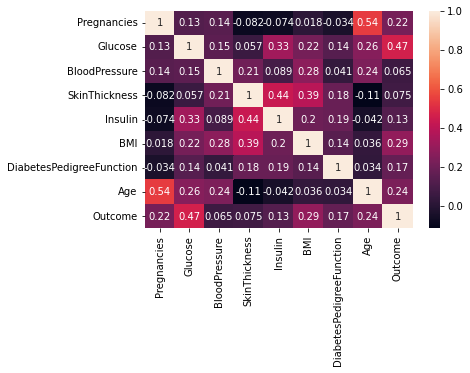

In [ ]:
cor=diabetes_dataset.corr()
sns.heatmap(cor, annot = True)
plt.show()

As we can see the Age,BMI,Insulin and glucose are the ones which are having a high corelation with the result of being diabetic or not(i.e the outcome)



---



Describing the data finding out mean,count,minimum value,maximum value and other important details.

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




---



Splitting data into two labels(Data preprocessing)

In [ ]:
P=diabetes_dataset.drop(columns='Outcome',axis=1)
Q=diabetes_dataset['Outcome']


P will contain all rows and columns except the outcome,
axis=1 indicates removal of a column 

In [ ]:
print(P)


     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

Q would contain only the outcome column

In [ ]:
print(Q)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

There are different range of values for the differnt columns so in order to achieve higher accuracy we standardize the data 

In [ ]:
standardscaler= StandardScaler()

In [ ]:
standardscaler.fit(P)

StandardScaler()

In [ ]:
# After fit,transforming and storing it in s_data
s_data=standardscaler.transform(P)

In [ ]:
#printing the new data with less differences between values
print(s_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
#storing it back in P
P=s_data
print(P)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


Splitting of the two variables into test and train,so that the model gets trained by particular data and is tested upon different data

In [ ]:
P_train, P_test, Q_train, Q_test = train_test_split(P,Q, test_size = 0.2, stratify=Q, random_state=23)

We are choosing the test size to be of 20% 

Printing the original  no P data and then split between the test and train

In [ ]:
print(P.shape, P_train.shape, P_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

In [ ]:
train = svm.SVC(kernel='linear')

Training the model within our given values  of training values
(SVM)

In [ ]:
train.fit(P_train, Q_train)

SVC(kernel='linear')

Finding the training accuracy with the function training_accuracy

In [ ]:
P_prediction = train.predict(P_train)
training_accuracy = accuracy_score(P_prediction, Q_train)

Printing the accuracy of the model(Training)

In [ ]:
print('The accuracy of training data is  : ', training_accuracy*100,'%')

The accuracy of training data is  :  78.66449511400651 %


Printing the accuracy of the model(Testing)

In [ ]:
testing_prediction = train.predict(P_test)
test_accuracy = accuracy_score(testing_prediction, Q_test)

In [ ]:
print('The accuracy of test data set is ',test_accuracy*100,'%')

The accuracy of test data set is  77.27272727272727 %


Using and predicting with naive bayes algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(P_train, Q_train)

GaussianNB()

In [ ]:
testing_prediciton_nb=bayes.predict(P_test)


In [ ]:
test_accuracybayes = accuracy_score(testing_prediciton_nb, Q_test)

Testing and predicting with RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomf = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 32)
randomf.fit(P_train, Q_train)

RandomForestClassifier(criterion='entropy', n_estimators=12, random_state=32)

In [ ]:
testing_prediction_ranfor = randomf.predict(P_test)
test_accuracy_ranfor = accuracy_score(testing_prediction_ranfor,Q_test)

Printing the accuracy of all three algorithms

In [ ]:
print('The accuracy of test data set in SVM ',test_accuracy*100,'%')
print('The accuracy of test data set in Bayes algorithm is  ',test_accuracybayes*100,'%')
print('The accuracy of test data set in random forest method   is  ',test_accuracy_ranfor*100,'%')


The accuracy of test data set in SVM  77.27272727272727 %
The accuracy of test data set in Bayes algorithm is   77.27272727272727 %
The accuracy of test data set in random forest method   is   74.67532467532467 %


As we can see that the accuracy of the data set is higheer of SVM and naive bayes as compared to randomforest.

# Finding the outcome(Diabetic or not with input values)

Here the user inputs values for finding out that he has diabetis or not
(Note: Please change calues of the array as per the order in the dataser.)

In [ ]:
#input or replace values in this array as per the order of the data
#array=[pregnacies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespdogreefunction,age]
array=[2,120,60,20,120,30,0.2,30]

check=np.asarray(array)

check1=check.reshape(1,-1)

input=standardscaler.transform(check1)
print(input)

#prints the value of the data which is tranformed and standardized as we did earler for higher accuracy




[[-0.54791859 -0.02799627 -0.47073225 -0.03365099  0.34905694 -0.25289651
  -0.8210987  -0.27575966]]


Run this block  after running the above block to find out if if person is diabetic or not accoirding to algorithm 

In [ ]:
predict_valuesgiven=train.predict(input)
print(predict_valuesgiven)

if(predict_valuesgiven[0]==1):
    print("The person is diabetic")
else:
    print("NO,The person is not diabetic")


[0]
NO


As we saw with our describe function the mean and other important factors of the dataset


In [ ]:
As we saw with our describe function the mean and other important factors of the dataset 

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We will try and compute for the mean values of each value

In [ ]:
#input or replace values in this array as per the order of the data
#array=[pregnacies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespdogreefunction,age]
#array=[3,120,69,20,79,31,0.471,33]

check=np.asarray(array)

check1=check.reshape(1,-1)

input=standardscaler.transform(check1)
print(input)




[[-0.54791859 -0.02799627 -0.47073225 -0.03365099  0.34905694 -0.25289651
  -0.8210987  -0.27575966]]


In [ ]:
predict_valuesgiven=train.predict(input)
print(predict_valuesgiven)

if(predict_valuesgiven[0]==1):
    print("The person is diabetic")
else:
    print("NO,the person is not diabetic")


[0]
NO


Now we check for all the values which are above 75 per cent as per our describe function and analysis of data we can say that the outcome should be 1(i.e diabetic)

In [ ]:
#input or replace values in this array as per the order of the data
#array=[pregnacies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespdogreefunction,age]

array=[6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000]
#array=[preg,gluc,bp,skin,ins,bmi,dpf,age]
check=np.asarray(array)

check1=check.reshape(1,-1)

input=standardscaler.transform(check1)
print(input)




[[0.63994726 0.60577092 0.56322275 0.71908574 0.41200793 0.58477051
  0.46622689 0.66020563]]


In [ ]:
predict_valuesgiven=train.predict(input)
print(predict_valuesgiven)

if(predict_valuesgiven[0]==1):
    print("The person is diabetic")
else:
    print("NO,the person is not diabetic")


[1]
Diabates


Getting results as Diabetic, as predicted from our describe function

Now lets keep the values of glucose,insulin,age and bmi as it is 75% higher values and all other values at the mean.(Beacuse our heat map said that glucose,insulin,age and bmi have high a correlation between the outcome as comapred 

In [ ]:
#input or replace values in this array as per the order of the data
#array=[pregnacies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespdogreefunction,age]

array=[3,140.25000,80.0000,20.5,127.250000,36.6,0.47,41]

check=np.asarray(array)

check1=check.reshape(1,-1)

input=standardscaler.transform(check1)
print(input)




[[-0.25095213  0.60577092  0.56322275 -0.00228696  0.41200793  0.58477051
  -0.00566665  0.66020563]]


In [ ]:
predict_valuesgiven=train.predict(input)
print(predict_valuesgiven)

if(predict_valuesgiven[0]==1):
    print("The person is diabetic")
else:
    print("NO,the person is not diabetic")


[1]
Diabates


The outcome is diabetic as was predicted by our heat map that glucose,insulin bmi and age have a greater impact on the outcome